### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №25

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

2.	Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 

3.	Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных. 

4.	Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 

5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

6.	Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

7.	Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

8.	Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

### Индивидуальный вариант:

Ozone Level Detection Data Set 

Название файла: eighthr.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection 

Класс: class (столбец No 74) 

Зависимая переменная: T_AV (столбец No 53) 

Метод обработки пропущенных значений – среднее значение класса 

Метод обработки выбросов – стандартизованная оценка (Z-score) 

Метод снижения размерности данных – регрессия лассо (Lasso) 

Регрессоры: 

⁃Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

⁃регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5  

⁃регрессии на основе метода ближайших соседей (KNeighborsRegressor), параметр n_neighbors в диапазоне от 1 до 5 

Показатели качества регрессии: 

⁃Для определения лучшего регрессора MAPE 

⁃Для визуализации кривой обучения MSLE  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [6]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data"

df = pd.read_csv(url, sep=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


2.	Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 

In [7]:
df.dtypes
# все признаки неправильно распознаны из-за обозначения пропущенных значений символом ?
# также в 0 столбце содержится нечисловой признак, удалим его

0      object
1      object
2      object
3      object
4      object
       ...   
69     object
70     object
71     object
72     object
73    float64
Length: 74, dtype: object

In [8]:
df = df.drop(0, axis=1)
df = df.replace('?', np.NaN)

In [9]:
for i in range(1,72):
    df[i] = df[i].astype(float)
df.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
       ...   
69    float64
70    float64
71    float64
72     object
73    float64
Length: 73, dtype: object

In [10]:
df.isnull().sum(axis=0)[[52,73]]
# в метке класса нет пропущенных значений

52    175
73      0
dtype: int64

In [11]:
df = df[df[52].notnull()]
df.isnull().sum(axis=0)[[52,73]]

52    0
73    0
dtype: int64

3.	Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.

In [12]:
df.isnull().sum(axis=0)
# в других столбцах есть пропуски

1     124
2     117
3     119
4     117
5     118
     ... 
69    109
70     83
71    142
72      2
73      0
Length: 73, dtype: int64

In [13]:
df.groupby(73).count()
df[73]=df[73].astype(int)
# у нас всего 2 класса

In [14]:
for i in range(1,72):
    df.loc[((df[i].isnull() == True) & (df[73] == 0.0)), [i]] = df.loc[df[73] == 0.0][i].mean()
    df.loc[((df[i].isnull() == True) & (df[73] == 1.0)), [i]] = df.loc[df[73] == 1.0][i].mean()

In [15]:
df.isnull().sum(axis=0)

1     0
2     0
3     0
4     0
5     0
     ..
69    0
70    0
71    0
72    2
73    0
Length: 73, dtype: int64

4.	Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.  

In [16]:
X = df.drop([52,73], axis=1)
y=df[73]

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [18]:
X_minmax

array([[0.10666667, 0.23376623, 0.33802817, ..., 0.94666667, 0.29090909,
        0.        ],
       [0.37333333, 0.41558442, 0.46478873, ..., 0.8       , 0.29090909,
        0.        ],
       [0.38666667, 0.36363636, 0.36619718, ..., 0.69333333, 0.34545455,
        0.        ],
       ...,
       [0.10666667, 0.1038961 , 0.16901408, ..., 0.8       , 0.36363636,
        0.        ],
       [0.17333333, 0.11688312, 0.21126761, ..., 0.72      , 0.38181818,
        0.00242131],
       [0.2       , 0.16883117, 0.25352113, ..., 0.65333333, 0.4       ,
        0.        ]])

In [19]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [20]:
# метод лассо говорил, что в данных присутствуют неопределенные значения, поэтому еще раз избавимся от них
df_tmp=pd.DataFrame(X_minmax)
df_tmp[71] = df[52]
df_tmp[72] = y

In [21]:
df_tmp = df_tmp[~df_tmp.isin([np.nan, np.inf, -np.inf]).any(1)]

In [22]:
X_new = df_tmp.drop(72, axis=1)
y = df_tmp[72]

In [23]:
X_new.shape, y.shape

((2182, 72), (2182,))

In [24]:
from sklearn.linear_model import LinearRegression
lasso1_reg = Lasso(0.0001)
lasso1_reg.fit(X_new, y)
lasso1_reg.coef_

array([-0.01116857, -0.        , -0.04215687,  0.03651802,  0.05545886,
        0.09839336,  0.07253311, -0.00970748, -0.02848888, -0.03526752,
       -0.10476113, -0.05882046, -0.07845396, -0.02169955, -0.02178694,
        0.        , -0.11654874,  0.22985229,  0.0419869 , -0.0210271 ,
       -0.        ,  0.        ,  0.00356661, -0.06289772, -0.00502095,
       -0.        , -0.        , -0.02149744, -0.        , -0.        ,
       -0.31797862, -0.        , -0.55622288,  0.48461505,  0.        ,
        0.05694141,  0.        ,  0.0185081 ,  0.        ,  0.07868332,
        0.        , -0.        , -0.00210923, -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.10739564,
        0.2849129 ,  0.27828435, -0.0155443 , -0.16386948, -0.13687311,
        0.20534381, -0.1777528 , -0.07646599, -0.0215698 , -0.02779637,
       -0.        ,  0.03594444, -0.04015485,  0.11057809,  0.03331638,
       -0.        , -0.        ,  0.08738189, -0.25357072, -0.13

In [25]:
np.argsort(lasso1_reg.coef_)[-4:]
# находим 3 самыз лучших признака, ни один из них не оказался откликом

array([17, 51, 50, 33], dtype=int64)

In [26]:
X_new.groupby(33).count()
# признак 33 принимает 311 различных значений

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
33,,,,,,,,,,,,,,,,,,,,,
0.000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.009119,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.015198,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.018237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.027356,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.984802,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.987842,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
0.990881,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [27]:
X_new.groupby(51).count()
# признак 51 принимает 245 различных значений

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
51,,,,,,,,,,,,,,,,,,,,,
0.000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.034810,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.082278,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.101266,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.117089,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.965190,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.971519,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.977848,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [28]:
X_new.groupby(50).count()
# признак 50 принимает 232 различных значения

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
50,,,,,,,,,,,,,,,,,,,,,
0.000000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.005013,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.007519,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.045113,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.047619,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.949875,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.962406,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.967419,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
X = X_new[[33,51,50,71]]

5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

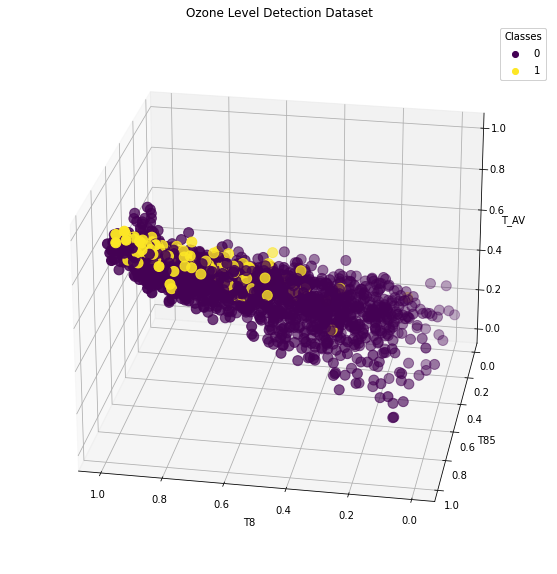

In [30]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = X[33]
ys = X[51]
zs = X[50]
scatter = ax.scatter( xs, ys, zs, c=y,s=100 )
ax.set_xlabel('T8')
ax.set_ylabel('T85')
ax.set_zlabel('T_AV')
ax.set_title('Ozone Level Detection Dataset')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

ax.view_init(azim=100, elev=25)

6.	Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

In [50]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X[33], X[71], test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[51], X[71], test_size=0.2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X[50], X[71], test_size=0.2)

In [54]:
# полиномиальная регрессия 
poly_reg1 = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())])
poly_reg1.fit(X_train1.to_numpy().reshape(-1, 1), y_train1.to_numpy().reshape(-1, 1))

poly_reg2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())])
poly_reg2.fit(X_train2.to_numpy().reshape(-1, 1), y_train2.to_numpy().reshape(-1, 1))

poly_reg3 = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())])
poly_reg3.fit(X_train3.to_numpy().reshape(-1, 1), y_train3.to_numpy().reshape(-1, 1))

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [55]:
# эластичная сеть
from sklearn.linear_model import ElasticNet

def ElNetRegression(degree, alpha,l1):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("elnet_reg", ElasticNet(alpha=alpha,l1_ratio=l1))])

elnet_reg1 = ElNetRegression(20, 0.5,0.5)
elnet_reg1.fit(X_train1.to_numpy().reshape(-1, 1), y_train1.to_numpy().reshape(-1, 1))

elnet_reg2 = ElNetRegression(20, 0.5,0.5)
elnet_reg2.fit(X_train2.to_numpy().reshape(-1, 1), y_train2.to_numpy().reshape(-1, 1))

elnet_reg3 = ElNetRegression(20, 0.5,0.5)
elnet_reg3.fit(X_train3.to_numpy().reshape(-1, 1), y_train3.to_numpy().reshape(-1, 1))

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('elnet_reg', ElasticNet(alpha=0.5))])

In [56]:
# метод ближайших соседей
from sklearn.neighbors import KNeighborsRegressor

knn_reg1 = KNeighborsRegressor(n_neighbors=5)
knn_reg1.fit(X_train1.to_numpy().reshape(-1, 1), y_train1.to_numpy().reshape(-1, 1))

knn_reg2 = KNeighborsRegressor(n_neighbors=5)
knn_reg2.fit(X_train2.to_numpy().reshape(-1, 1), y_train2.to_numpy().reshape(-1, 1))

knn_reg3 = KNeighborsRegressor(n_neighbors=5)
knn_reg3.fit(X_train3.to_numpy().reshape(-1, 1), y_train3.to_numpy().reshape(-1, 1))

KNeighborsRegressor()

In [57]:
# найдем лучшие параметры для каждого регрессора
from sklearn.model_selection import GridSearchCV

param_grid1 = [{"degree": [i for i in range(2, 6)]}]

poly_reg = PolynomialFeatures()
grid_search = GridSearchCV(poly_reg, param_grid1, n_jobs=-1, verbose=1, scoring='accuracy')

In [59]:
grid_search.fit(X_train1.to_numpy().reshape(-1, 1), y_train1.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


{'degree': 2}

In [60]:
grid_search.fit(X_train2.to_numpy().reshape(-1, 1), y_train2.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


{'degree': 2}

In [61]:
grid_search.fit(X_train3.to_numpy().reshape(-1, 1), y_train3.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


{'degree': 2}

In [64]:
param_grid2= [{"alpha": [0.1 * np.random.randint(5,16)], 
                "l1_ratio":[0.1 * np.random.randint(5,11)]}] # l1 должен быть в диапазоне 0-1

elnet_reg = ElasticNet()
grid_search = GridSearchCV(elnet_reg, param_grid2, n_jobs=-1, verbose=1)

In [65]:
grid_search.fit(X_train1.to_numpy().reshape(-1, 1), y_train1.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'alpha': 1.5, 'l1_ratio': 0.8}

In [66]:
grid_search.fit(X_train2.to_numpy().reshape(-1, 1), y_train2.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'alpha': 1.5, 'l1_ratio': 0.8}

In [67]:
grid_search.fit(X_train3.to_numpy().reshape(-1, 1), y_train3.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'alpha': 1.5, 'l1_ratio': 0.8}

In [37]:
#elnet1_reg.get_params().keys()

In [68]:
param_grid3 = [{"n_neighbors": [i for i in range(1, 6)]}]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid3, n_jobs=-1, verbose=1)

In [69]:
grid_search.fit(X_train1.to_numpy().reshape(-1, 1), y_train1.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_neighbors': 5}

In [70]:
grid_search.fit(X_train2.to_numpy().reshape(-1, 1), y_train2.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_neighbors': 5}

In [71]:
grid_search.fit(X_train3.to_numpy().reshape(-1, 1), y_train3.to_numpy().reshape(-1, 1))
grid_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_neighbors': 5}

7.	Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

In [72]:
# напишем функцию для расчета показателя качества
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [105]:
# 6 из 9-и регрессоров были изначально созданы с лучшими параметрами, пересоздадим остальные
elnet_reg1 = ElNetRegression(20, 1.5, 0.8)
elnet_reg1.fit(X_train1.to_numpy().reshape(-1, 1), y_train1.to_numpy().reshape(-1, 1))

elnet_reg2 = ElNetRegression(20, 1.5, 0.8)
elnet_reg2.fit(X_train2.to_numpy().reshape(-1, 1), y_train2.to_numpy().reshape(-1, 1))

elnet_reg3 = ElNetRegression(20, 1.5, 0.8)
elnet_reg3.fit(X_train3.to_numpy().reshape(-1, 1), y_train3.to_numpy().reshape(-1, 1))

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('elnet_reg', ElasticNet(alpha=1.5, l1_ratio=0.8))])

In [87]:
mape(y_test1, poly_reg1.predict(y_test1.to_numpy().reshape(-1, 1)))

6831.1330491792305

In [106]:
mape(y_test2, elnet_reg1.predict(y_test2.to_numpy().reshape(-1, 1)))

190863.99380023594

In [89]:
mape(y_test3, knn_reg1.predict(y_test3.to_numpy().reshape(-1, 1)))
# лучшее значение показателя качества у метода ближайших соседей

89.45060439571628

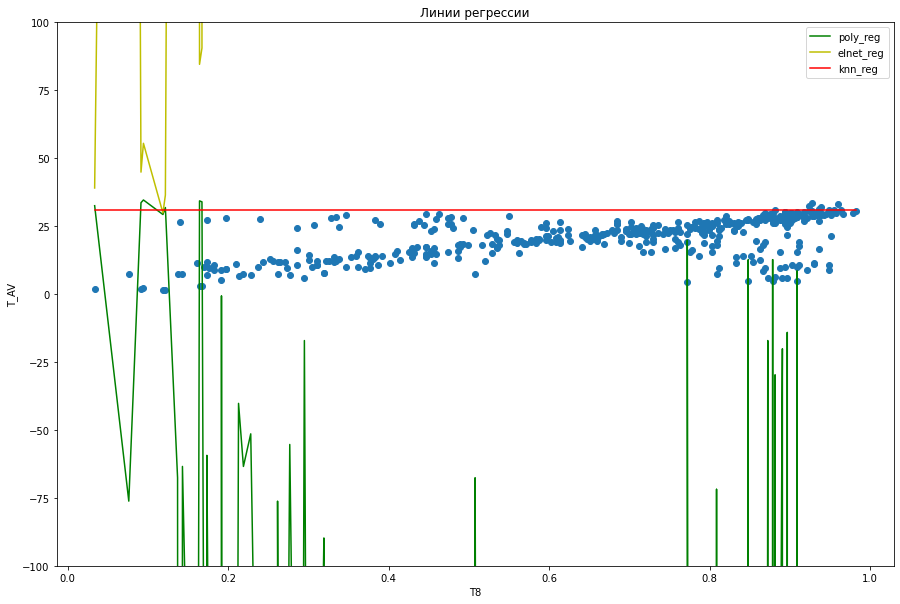

In [115]:
# линии регрессии для первого набора данных
plt.figure(figsize=(15,10))

plt.scatter(X_test1, y_test1)
plt.plot(np.sort(X_test1), poly_reg1.predict(y_test1.to_numpy().reshape(-1, 1))[np.argsort(X_test1)], color='g', label='poly_reg')
plt.plot(np.sort(X_test1), elnet_reg1.predict(y_test1.to_numpy().reshape(-1, 1))[np.argsort(X_test1)], color='y', label='elnet_reg')
plt.plot(np.sort(X_test1), knn_reg1.predict(y_test1.to_numpy().reshape(-1, 1))[np.argsort(X_test1)], color='r', label='knn_reg')

plt.xlabel("T8")
plt.ylabel("T_AV")
plt.title("Линии регрессии")
plt.ylim(-100,100)
plt.legend()
plt.show()

In [95]:
mape(y_test2, poly_reg2.predict(y_test2.to_numpy().reshape(-1, 1)))

22581.07574468381

In [96]:
mape(y_test2, elnet_reg2.predict(y_test2.to_numpy().reshape(-1, 1)))

31943336.624993093

In [97]:
mape(y_test2, knn_reg2.predict(y_test2.to_numpy().reshape(-1, 1)))
# лучшее значение показателя качества у метода ближайших соседей

78.69965767051671

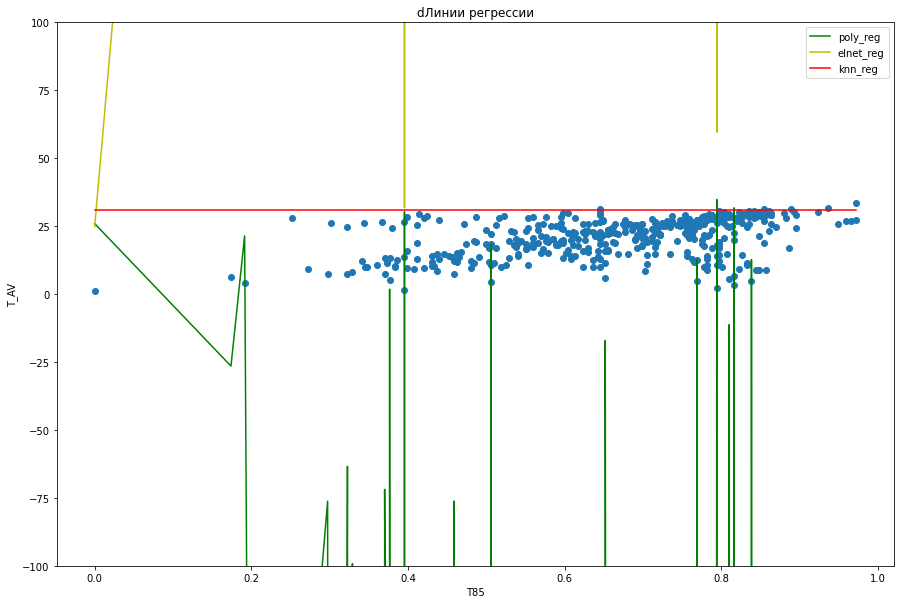

In [113]:
# линии регрессии для второго набора данных
plt.figure(figsize=(15,10))

plt.scatter(X_test2, y_test2)
plt.plot(np.sort(X_test2), poly_reg1.predict(y_test2.to_numpy().reshape(-1, 1))[np.argsort(X_test2)], color='g', label='poly_reg')
plt.plot(np.sort(X_test2), elnet_reg1.predict(y_test2.to_numpy().reshape(-1, 1))[np.argsort(X_test2)], color='y', label='elnet_reg')
plt.plot(np.sort(X_test2), knn_reg1.predict(y_test2.to_numpy().reshape(-1, 1))[np.argsort(X_test2)], color='r', label='knn_reg')

plt.xlabel("T85")
plt.ylabel("T_AV")
plt.title("dЛинии регрессии")
plt.ylim(-100,100)
plt.legend()
plt.show()

In [99]:
mape(y_test3, poly_reg3.predict(y_test3.to_numpy().reshape(-1, 1)))

5710.775945685877

In [100]:
mape(y_test3, elnet_reg3.predict(y_test3.to_numpy().reshape(-1, 1)))

8615681.641401

In [101]:
mape(y_test3, knn_reg3.predict(y_test3.to_numpy().reshape(-1, 1)))
# лучшее значение показателя качества у метода ближайших соседей
# лучший показатель в целом у метода ближайших соседей на второй выборке

100.4793821478849

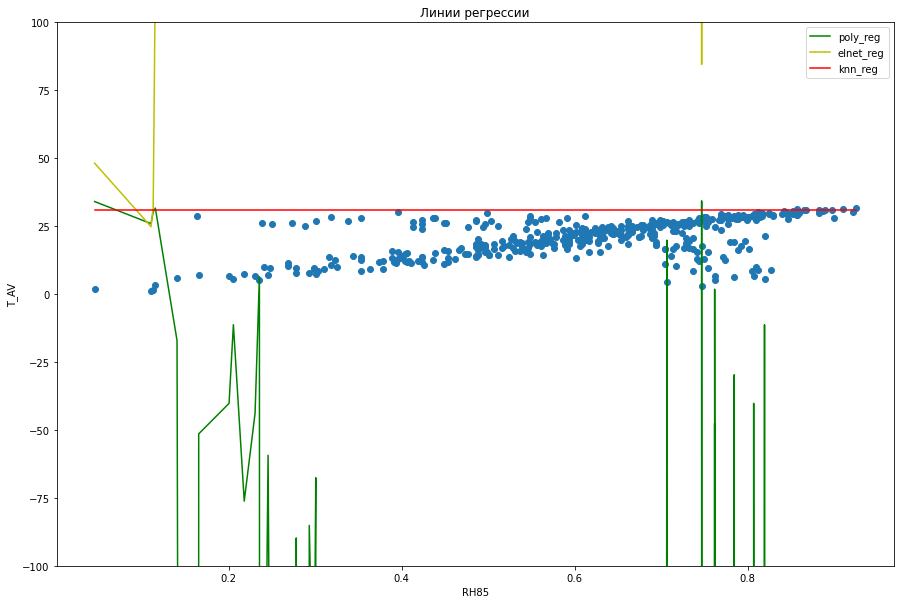

In [114]:
# линии регрессии для третьего набора данных
plt.figure(figsize=(15,10))

plt.scatter(X_test3, y_test3)
plt.plot(np.sort(X_test3), poly_reg1.predict(y_test3.to_numpy().reshape(-1, 1))[np.argsort(X_test3)], color='g', label='poly_reg')
plt.plot(np.sort(X_test3), elnet_reg1.predict(y_test3.to_numpy().reshape(-1, 1))[np.argsort(X_test3)], color='y', label='elnet_reg')
plt.plot(np.sort(X_test3), knn_reg1.predict(y_test3.to_numpy().reshape(-1, 1))[np.argsort(X_test3)], color='r', label='knn_reg')

plt.xlabel("RH85")
plt.ylabel("T_AV")
plt.title("Линии регрессии")
plt.ylim(-100,100)
plt.legend()
plt.show()

8.	Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

In [116]:
X_train1.shape

(1745,)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
train_score1 = []
test_score1 = []
train_score2 = []
test_score2 = []
train_score3 = []
test_score3 = []

for i in range(5, 1746): # начнем цикл от пяти т.к. регрессору ближайших соседей нужно как минимум 5 образцов
    # первый набор данных
    knn_reg1.fit(X_train1.to_numpy().reshape(-1, 1)[:i], y_train1.to_numpy().reshape(-1, 1)[:i])
    
    y_train_predict = knn_reg1.predict(X_test1.to_numpy().reshape(-1, 1)[:i])
    train_score1.append(mean_squared_log_error(y_test1[:i], y_train_predict))
    
    y_test_predict = knn_reg1.predict(X_test1.to_numpy().reshape(-1, 1))
    test_score1.append(mean_squared_log_error(y_test1, y_test_predict))
    
    # второй набор данных
    knn_reg2.fit(X_train2.to_numpy().reshape(-1, 1)[:i], y_train2.to_numpy().reshape(-1, 1)[:i])
    
    y_train_predict = knn_reg2.predict(X_test2.to_numpy().reshape(-1, 1)[:i])
    train_score2.append(mean_squared_log_error(y_test2[:i], y_train_predict))
    
    y_test_predict = knn_reg2.predict(X_test2.to_numpy().reshape(-1, 1))
    test_score2.append(mean_squared_log_error(y_test2, y_test_predict))
    
    # третий набор данных
    knn_reg3.fit(X_train3.to_numpy().reshape(-1, 1)[:i], y_train3.to_numpy().reshape(-1, 1)[:i])
    
    y_train_predict = knn_reg3.predict(X_test3.to_numpy().reshape(-1, 1)[:i])
    train_score3.append(mean_squared_log_error(y_test3[:i], y_train_predict))
    
    y_test_predict = knn_reg3.predict(X_test3.to_numpy().reshape(-1, 1))
    test_score3.append(mean_squared_log_error(y_test3, y_test_predict))

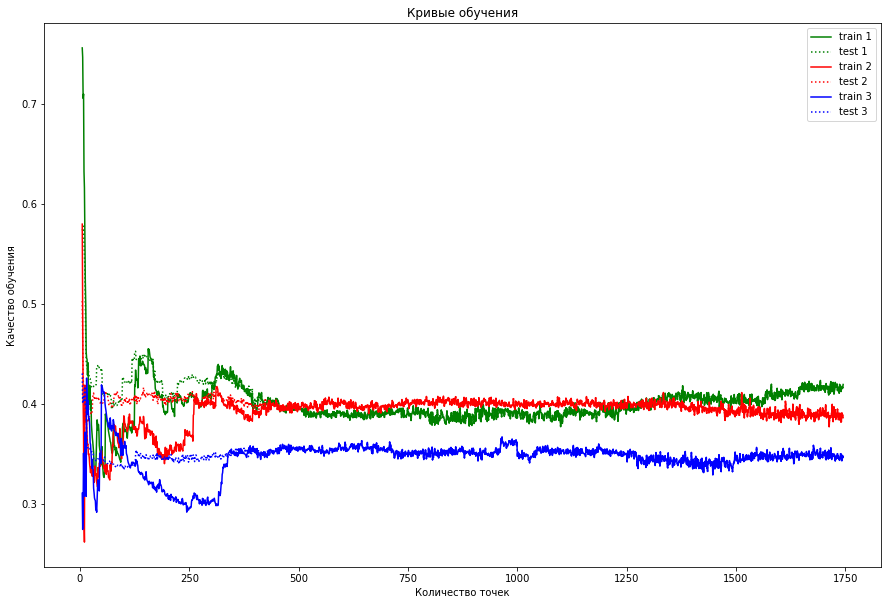

In [140]:
plt.figure(figsize=(15,10))
plt.plot([i for i in range(5, 1746)], np.sqrt(train_score1), label="train 1", c='g')
plt.plot([i for i in range(5, 1746)], np.sqrt(test_score1), ':', label="test 1", c='g')
plt.plot([i for i in range(5, 1746)], np.sqrt(train_score2), label="train 2", c='r')
plt.plot([i for i in range(5, 1746)], np.sqrt(test_score2), ':', label="test 2", c='r')
plt.plot([i for i in range(5, 1746)], np.sqrt(train_score3), label="train 3", c='b')
plt.plot([i for i in range(5, 1746)], np.sqrt(test_score3), ':', label="test 3", c='b')
plt.xlabel("Количество точек")
plt.ylabel("Качество обучения")
plt.title("Кривые обучения")
plt.legend()
plt.show()